In [1]:
import sympy
import numpy as np
import meshplot as mp
import plotly.graph_objects as go

# Quadratic Trajectory

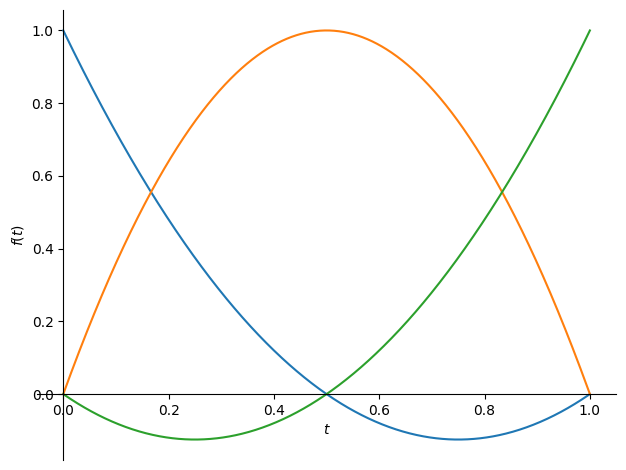

In [2]:
def b0(t):
    return 2 * t**2 - 3 * t + 1


def b1(t):
    return -4 * t**2 + 4 * t


def b2(t):
    return 2 * t**2 - t


t = sympy.symbols('t')
_ = sympy.plot(b0(t), b1(t), b2(t), (t, 0, 1))

In [3]:
x0, x1, x2 = np.array(sympy.symbols('a b', real=True)), np.array(
    sympy.symbols('c d', real=True)), np.array(sympy.symbols('f g', real=True))
t0, t1 = sympy.symbols('t_0, t_1', nonnegative=True, real=True)
# t0, t1 = 0, 1
t0._assumptions

{'nonnegative': True,
 'real': True,
 'finite': True,
 'hermitian': True,
 'negative': False,
 'infinite': False,
 'complex': True,
 'imaginary': False,
 'extended_nonnegative': True,
 'extended_negative': False,
 'commutative': True,
 'extended_real': True}

In [4]:
def q(t):
    return b0(t) * x0 + b1(t) * x1 + b2(t) * x2


def l(t):
    return (q(t1) - q(t0)) * t + q(t0)


def d(t):
    # s = (t1 - t0) * t + t0
    s = (t - t0) / (t1 - t0)
    return ((q(t) - l(s)).T @ (q(t) - l(s)))

In [ ]:
# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for t1_val in np.linspace(0.1, 1, 10):
    subs = {x0[0]: 0, x0[1]: 0, x1[0]: 0, x1[1]
        : 1, x2[0]: 1, x2[1]: 1, t0: 0, t1: t1_val}
    ts = np.linspace(0, t1_val, 100)
    dt = np.array([d(t).subs(subs | {t: x}).evalf() for x in ts], dtype=float)
    fig.add_trace(go.Scatter(
        visible=False, line=dict(color="#00CED1", width=6), x=ts, y=dt))

# Make 10th trace visible
fig.data[-1].visible = True

# Create and add slider
steps = []
# for i in range(len(fig.data)):
for i, t1_val in enumerate(np.linspace(0.1, 1, 10)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"xaxis_range": [0, t1_val]},
              # layout attribute
              {"title": "Slider switched to step: " + str(i)}],
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [6]:
display(d(t).simplify())

(((t - t_0)*(a*(2*t_0**2 - 3*t_0 + 1) - a*(2*t_1**2 - 3*t_1 + 1) - 4*c*t_0*(t_0 - 1) + 4*c*t_1*(t_1 - 1) + f*t_0*(2*t_0 - 1) - f*t_1*(2*t_1 - 1)) + (t_0 - t_1)*(-a*(2*t**2 - 3*t + 1) + a*(2*t_0**2 - 3*t_0 + 1) + 4*c*t*(t - 1) - 4*c*t_0*(t_0 - 1) - f*t*(2*t - 1) + f*t_0*(2*t_0 - 1)))**2 + ((t - t_0)*(b*(2*t_0**2 - 3*t_0 + 1) - b*(2*t_1**2 - 3*t_1 + 1) - 4*d*t_0*(t_0 - 1) + 4*d*t_1*(t_1 - 1) + g*t_0*(2*t_0 - 1) - g*t_1*(2*t_1 - 1)) + (t_0 - t_1)*(-b*(2*t**2 - 3*t + 1) + b*(2*t_0**2 - 3*t_0 + 1) + 4*d*t*(t - 1) - 4*d*t_0*(t_0 - 1) - g*t*(2*t - 1) + g*t_0*(2*t_0 - 1)))**2)/(t_0 - t_1)**2

In [7]:
d(t).diff(t).simplify()

2*(-((t - t_0)*(a*(2*t_0**2 - 3*t_0 + 1) - a*(2*t_1**2 - 3*t_1 + 1) - 4*c*t_0*(t_0 - 1) + 4*c*t_1*(t_1 - 1) + f*t_0*(2*t_0 - 1) - f*t_1*(2*t_1 - 1)) + (t_0 - t_1)*(-a*(2*t**2 - 3*t + 1) + a*(2*t_0**2 - 3*t_0 + 1) + 4*c*t*(t - 1) - 4*c*t_0*(t_0 - 1) - f*t*(2*t - 1) + f*t_0*(2*t_0 - 1)))*(-a*(2*t_0**2 - 3*t_0 + 1) + a*(2*t_1**2 - 3*t_1 + 1) + 4*c*t_0*(t_0 - 1) - 4*c*t_1*(t_1 - 1) - f*t_0*(2*t_0 - 1) + f*t_1*(2*t_1 - 1) + (t_0 - t_1)*(a*(4*t - 3) - 4*c*(2*t - 1) + f*(4*t - 1))) - ((t - t_0)*(b*(2*t_0**2 - 3*t_0 + 1) - b*(2*t_1**2 - 3*t_1 + 1) - 4*d*t_0*(t_0 - 1) + 4*d*t_1*(t_1 - 1) + g*t_0*(2*t_0 - 1) - g*t_1*(2*t_1 - 1)) + (t_0 - t_1)*(-b*(2*t**2 - 3*t + 1) + b*(2*t_0**2 - 3*t_0 + 1) + 4*d*t*(t - 1) - 4*d*t_0*(t_0 - 1) - g*t*(2*t - 1) + g*t_0*(2*t_0 - 1)))*(-b*(2*t_0**2 - 3*t_0 + 1) + b*(2*t_1**2 - 3*t_1 + 1) + 4*d*t_0*(t_0 - 1) - 4*d*t_1*(t_1 - 1) - g*t_0*(2*t_0 - 1) + g*t_1*(2*t_1 - 1) + (t_0 - t_1)*(b*(4*t - 3) - 4*d*(2*t - 1) + g*(4*t - 1))))/(t_0 - t_1)**2

In [8]:
sympy.Poly(d(t), t).degree()

4

In [9]:
d_max = sympy.calculus.util.maximum(
    d(t).subs({t0: 0, t1: 0.125}), t, domain=sympy.Interval(0, 1))
display(d_max)
# print(sympy.pycode(d_max).replace('**', '^'))

Max(0.000244140625*(-0.5*a + c - 0.5*f)**2 + 0.000244140625*(-0.5*b + d - 0.5*g)**2, 12.25*(0.5*a - c + 0.5*f)**2 + 12.25*(0.5*b - d + 0.5*g)**2)

In [10]:
for sol in sympy.solve(d(t).diff(t), t):
    display(sol.simplify())

t_0

t_1

t_0/2 + t_1/2

In [11]:
from sympy import Q, assuming, ask
with assuming(Q.is_true(t0 <= 1), Q.is_true(t1 <= 1), Q.is_true(t0 <= t1)):
    pass
    # d_max = sympy.calculus.util.maximum(d(t), t, domain=sympy.Interval(0, 1))
    # display(d_max)

In [12]:
print(sympy.pycode(d(t).simplify()).replace("**", "^").replace("t", "x"))

(((x - x_0)*(a*(2*x_0^2 - 3*x_0 + 1) - a*(2*x_1^2 - 3*x_1 + 1) - 4*c*x_0*(x_0 - 1) + 4*c*x_1*(x_1 - 1) + f*x_0*(2*x_0 - 1) - f*x_1*(2*x_1 - 1)) + (x_0 - x_1)*(-a*(2*x^2 - 3*x + 1) + a*(2*x_0^2 - 3*x_0 + 1) + 4*c*x*(x - 1) - 4*c*x_0*(x_0 - 1) - f*x*(2*x - 1) + f*x_0*(2*x_0 - 1)))^2 + ((x - x_0)*(b*(2*x_0^2 - 3*x_0 + 1) - b*(2*x_1^2 - 3*x_1 + 1) - 4*d*x_0*(x_0 - 1) + 4*d*x_1*(x_1 - 1) + g*x_0*(2*x_0 - 1) - g*x_1*(2*x_1 - 1)) + (x_0 - x_1)*(-b*(2*x^2 - 3*x + 1) + b*(2*x_0^2 - 3*x_0 + 1) + 4*d*x*(x - 1) - 4*d*x_0*(x_0 - 1) - g*x*(2*x - 1) + g*x_0*(2*x_0 - 1)))^2)/(x_0 - x_1)^2


# Rigid Trajectory

## 2D

In [13]:
def R(theta):
    return np.array([[sympy.cos(theta), -sympy.sin(theta)], [sympy.sin(theta), sympy.cos(theta)]])


theta = sympy.Symbol('\\theta')


def r(t):
    return R(theta * t) @ x0 + t * x1


def l(t):
    return (1-t) * r(t0) + t * r(t1)


def d(t):
    s = (t - t0) / (t1 - t0)
    return ((r(t) - l(s)).T @ (r(t) - l(s)))

(a*sin(\theta*t) + b*cos(\theta*t) + d*t - (t - t_0)*(a*sin(\theta*t_1) + b*cos(\theta*t_1) + d*t_1)/(-t_0 + t_1) - (-(t - t_0)/(-t_0 + t_1) + 1)*(a*sin(\theta*t_0) + b*cos(\theta*t_0) + d*t_0))**2 + (a*cos(\theta*t) - b*sin(\theta*t) + c*t - (t - t_0)*(a*cos(\theta*t_1) - b*sin(\theta*t_1) + c*t_1)/(-t_0 + t_1) - (-(t - t_0)/(-t_0 + t_1) + 1)*(a*cos(\theta*t_0) - b*sin(\theta*t_0) + c*t_0))**2

(-t*(-sin(\theta) + cos(\theta) + 1) + 2*t - sin(\theta*t) + cos(\theta*t) - 1)**2 + (-t*(sin(\theta) + cos(\theta) + 1) + 2*t + sin(\theta*t) + cos(\theta*t) - 1)**2

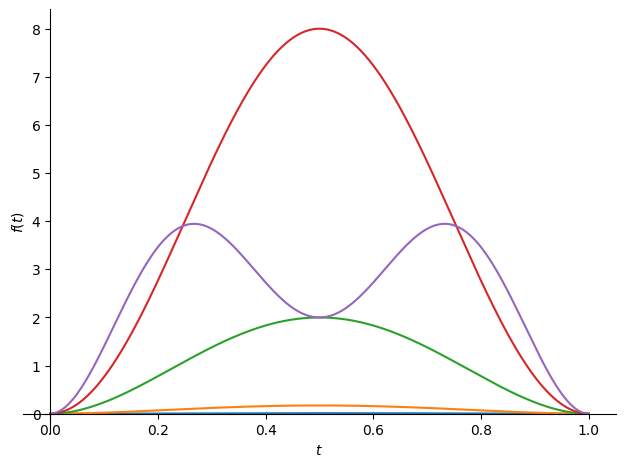

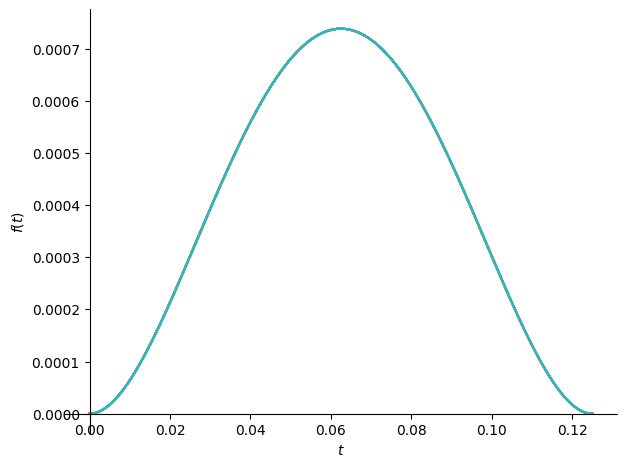

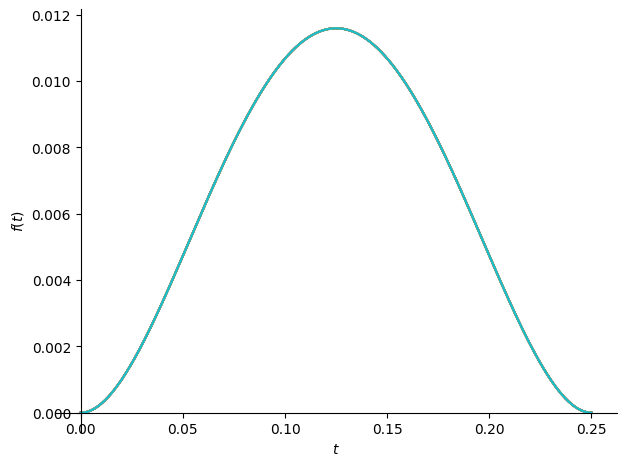

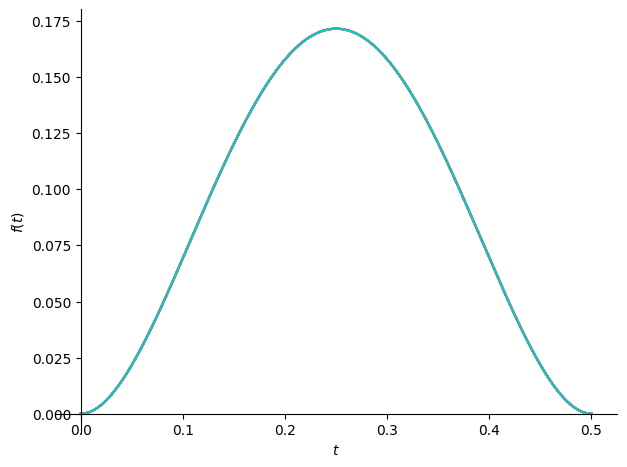

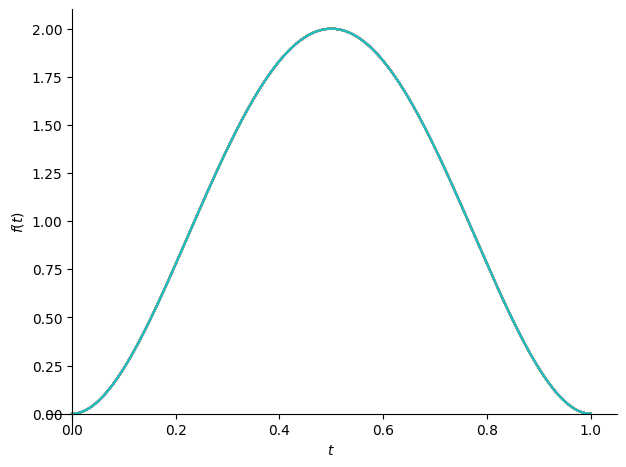

In [14]:
t = sympy.Symbol('t')
display(d(t))
# print(sympy.pycode(d(t).simplify()).replace("**", "^").replace("math.", "").replace("t", "x"))
subs = {x0[0]: 1, x0[1]: 1, x1[0]: 1, x1[1]: 1, t0: 0, t1: 1}
display(d(t).subs(subs))
# display(d(t).subs(subs))
sympy.plot(*[d(t).subs(subs | {theta: k * sympy.pi})
           for k in [1/4, 1/2, 1, 2, 3]], (t, 0, 1))
for t1_val in [0.125, 0.25, 0.5, 1.0]:
    sympy.plot(*[d(t).subs(subs | {t1: t1_val, theta: sympy.pi, x1[0]: x10})
               for x10 in np.linspace(-1, 1, 10)], (t, 0, t1_val))

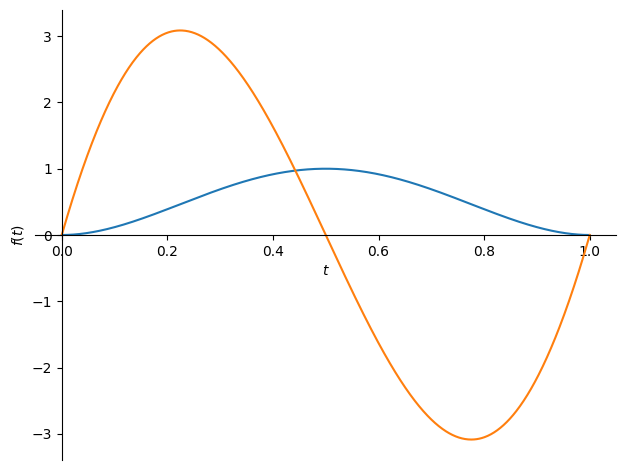

0

In [15]:
# d_max = sympy.calculus.util.maximum(d(t).subs(subs | {theta: sympy.pi/4}), t, domain=sympy.Interval(0, 1))
# display(d_max)
# sympy.solve(d(t).subs(subs | {theta: sympy.pi/2}).diff(t), t)
subs = {x0[0]: 1, x0[1]: 0, x1[0]: 0.5, x1[1]: 0.5, t0: 0, t1: 1}
sympy.plot((d(t).subs(subs | {theta: sympy.pi}), (t, 0, 1)),
           (d(t).subs(subs | {theta: sympy.pi}).diff(t), (t, 0, 1)))
# sympy.plot(d(t).subs({x0[0]:1, t0: 0, t1: 1, theta: sympy.pi/2}).diff(t).subs({t: 0.5}))
d(t).subs(subs | {theta: sympy.pi}).diff(t).subs({t: 0.5})

## 3D

In [16]:
def sinc(x):
    return 1 if x == 0 else sympy.sin(x) / x


def screw(x):
    return np.array([
        [0, -x[2], x[1]],
        [x[2], 0, -x[0]],
        [-x[1], x[0], 0]
    ])


def R3D(theta):
    angle = sympy.sqrt(theta.dot(theta))
    if angle == 0:
        return np.eye(3)
    K = screw(theta)
    R = np.eye(3) + sinc(angle) * screw(theta) + 0.5 * sinc(angle/2)**2 * K @ K
    return R

In [17]:
x = sympy.Matrix(sympy.symbols("x y z"))  # position in inertial frame
theta = sympy.Matrix(sympy.symbols(
    "\\theta_{0x} \\theta_{0y} \\theta_{0z}"))  # current rotation
dtheta = sympy.Matrix(sympy.symbols(
    # change in rotation
    "\\Delta{\\theta_{1x}} \\Delta{\\theta_{1y}} \\Delta{\\theta_{1z}}"))
u = sympy.Matrix(sympy.symbols("u_{0x} u_{0y} u_{0z}"))  # current translation
# change in translation
du = sympy.Matrix(sympy.symbols(
    "\\Delta{u_{x}} \\Delta{u_{y}} \\Delta{u_{z}}"))


def r(t):
    return R3D(theta + t * dtheta) @ x + (u + t * du)


def l(t):
    return (1-t) * r(0) + t * r(1)


def d(t):
    s = (t - t0) / (t1 - t0)
    return (((r(t) - l(s)).T @ (r(t) - l(s))))[0, 0]

In [18]:
d(t).subs({t0: 0, t1: 1}).diff(du)

Matrix([
[0],
[0],
[0]])

In [19]:
subs = {
    x[0]: 1, x[1]: 1, x[2]: 0,
    theta[0]: 0.01, theta[1]: 0, theta[2]: 0.01,
    dtheta[0]: 0.1, dtheta[1]: 0.1, dtheta[2]: 0.1,
    u[0]: 0, u[1]: 0, u[2]: 0,
    du[0]: 0.1, du[1]: 0.1, du[2]: 0.1,
    t0: 0, t1: 1
}

In [20]:
ts = np.linspace(0, 1, 100)
rt = r(t).subs(subs)
rt = np.hstack([np.array(rt.subs(t, ti).evalf(), dtype=float) for ti in ts])

lt = l(t).subs(subs)
lt = np.hstack([np.array(lt.subs(t, ti).evalf(), dtype=float) for ti in ts])

dt = d(t).subs(subs)
dt = np.array([dt.subs(t, ti).evalf() for ti in ts], dtype=float)

links = []
links_color = []
n = 10
for i in range(len(ts)//n):
    links.extend([rt[:, n*i], lt[:, n*i], [None, None, None]])
    links_color.extend([dt[n*i], dt[n*i], 0])
links_x = [l[0] for l in links]
links_y = [l[1] for l in links]
links_z = [l[2] for l in links]

In [21]:
np.argmax(dt)/len(dt)

0.5

In [22]:
go.Figure(data=[
    go.Scatter3d(x=rt[0], y=rt[1], z=rt[2], mode="lines",
                 line=dict(width=10, color=dt, colorscale="Viridis")),
    go.Scatter3d(x=lt[0], y=lt[1], z=lt[2], mode="lines",
                 line=dict(width=10, color=dt, colorscale="Viridis")),
    go.Scatter3d(x=links_x, y=links_y, z=links_z, mode="lines",
                 line=dict(width=10, color=links_color, colorscale="Viridis"))
], layout=dict(width=800, height=800))